导入库

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

读取数据

In [ ]:
data = pd.read_excel("data.xlsx",header = [1])

查看前几行数据

In [12]:
data.head()

,Temperature(K),Pressure(Mpa),Sound Speed(m/s）
0,210,0.1,918.76
1,230,0.1,822.43
2,250,0.1,146.74
3,270,0.1,153.23
4,290,0.1,159.21


提取特征和标签,x是特征集合，y是标签

In [32]:
Temperature = data['Temperature(K)']
Pressure = data['Pressure(Mpa)']
x = data[['Temperature(K)','Pressure(Mpa)']]
y = data['Sound Speed(m/s）']

画出散点图看看特征和标签的关系

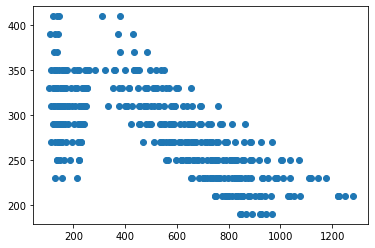

In [82]:
plt.scatter(y, Temperature)

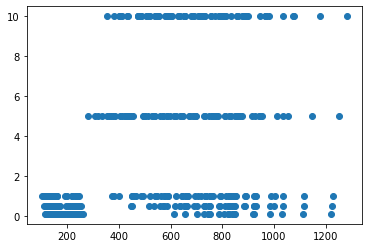

In [83]:
plt.scatter(y, Pressure)

1.导入库，2.建立模型

In [60]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
model_decision_tree_regression = tree.DecisionTreeRegressor()
model_SVR = svm.SVR()
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=10)#这里使用10个决策树

训练模型

In [61]:
tree_regression = model_decision_tree_regression.fit(x,y)
SVR = model_SVR.fit(x,y)
GradientBoostingRegressor = model_GradientBoostingRegressor.fit(x,y)

对训练集进行预测

In [62]:
pre = tree_regression.predict(x)
pre1 = SVR.predict(x)
pre2 = GradientBoostingRegressor.predict(x)

In [12]:
item = range(y.shape[0])
print(item)

range(0, 795)


画图，将预测值和实际值进行对比

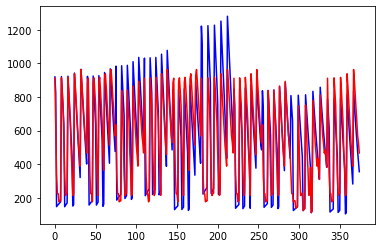

In [52]:
plt.plot(item, y, color="blue", linewidth=1.5, linestyle="-")
plt.plot(item, pre, color="red", linewidth=1.5, linestyle="-")

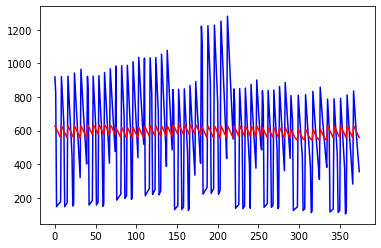

In [57]:
plt.plot(item, y, color="blue", linewidth=1.5, linestyle="-")
plt.plot(item, pre1, color="red", linewidth=1.5, linestyle="-")

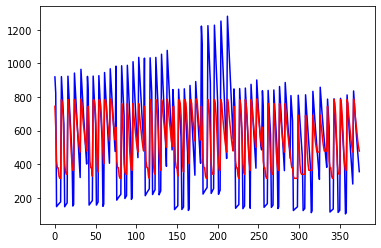

In [63]:
plt.plot(item, y, color="blue", linewidth=1.5, linestyle="-")
plt.plot(item, pre2, color="red", linewidth=1.5, linestyle="-")

计算r2相关系数

In [71]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [81]:
r2 = r2_score(pre, y)
print("R2相关系数为：",r2)

R2相关系数为： 0.6827061776068242


#### 从这里开始是加了类别的数据,步骤基本一致

In [6]:
data2 = pd.read_excel("data2.xlsx")

In [7]:
data2.head()

,category,Temperature(K),Pressure(Mpa),Sound Speed(m/s）
0,1,210,0.1,918.76
1,1,230,0.1,822.43
2,1,250,0.1,146.74
3,1,270,0.1,153.23
4,1,290,0.1,159.21


In [10]:
Category = data2['category']
Temperature = data2['Temperature(K)']
Pressure = data2['Pressure(Mpa)']
x = data2[['category','Temperature(K)','Pressure(Mpa)']]
y = data2['Sound Speed(m/s）']

In [11]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
model_decision_tree_regression = tree.DecisionTreeRegressor()
model_SVR = svm.SVR()
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=10)#这里使用10个决策树

tree_regression = model_decision_tree_regression.fit(x,y)
SVR = model_SVR.fit(x,y)
GradientBoostingRegressor = model_GradientBoostingRegressor.fit(x,y)

In [14]:
pre = tree_regression.predict(x)
pre1 = SVR.predict(x)
pre2 = GradientBoostingRegressor.predict(x)

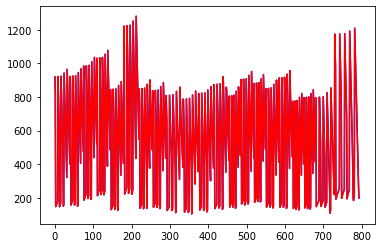

In [15]:
plt.plot(item, y, color="blue", linewidth=1.5, linestyle="-")
plt.plot(item, pre, color="red", linewidth=1.5, linestyle="-")

In [17]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [18]:
r2 = r2_score(pre, y)
print("R2相关系数为：",r2)

R2相关系数为： 1.0


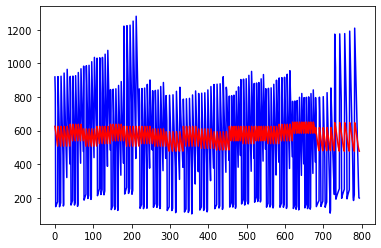

In [19]:
plt.plot(item, y, color="blue", linewidth=1.5, linestyle="-")
plt.plot(item, pre1, color="red", linewidth=1.5, linestyle="-")

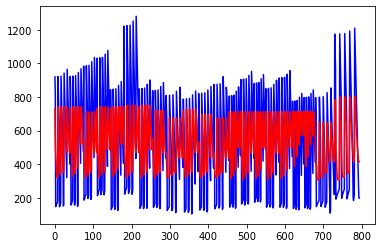

In [20]:
plt.plot(item, y, color="blue", linewidth=1.5, linestyle="-")
plt.plot(item, pre2, color="red", linewidth=1.5, linestyle="-")

#### 这里开始是第三个模型

首先打乱数据

In [88]:
data2 = data2.sample(frac=1)

把数据分为两个部分，一个是训练数据，一个是测试数据，后面基本一致了

In [89]:
train_data = data2.loc[:600]
test_data = data2.loc[600:]

In [90]:
Category = train_data['category']
Temperature = train_data['Temperature(K)']
Pressure = train_data['Pressure(Mpa)']
x = train_data[['category','Temperature(K)','Pressure(Mpa)']]
y = train_data['Sound Speed(m/s）']

In [250]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import datasets, linear_model

model_decision_tree_regression = tree.DecisionTreeRegressor(min_samples_leaf = 4, max_depth = 8)
model_SVR = svm.SVR()
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=10)#这里使用10个决策树

tree_regression = model_decision_tree_regression.fit(x,y)
SVR = model_SVR.fit(x,y)
GradientBoostingRegressor = model_GradientBoostingRegressor.fit(x,y)

pre = tree_regression.predict(x)
pre1 = SVR.predict(x)
pre2 = GradientBoostingRegressor.predict(x)

In [244]:
test_x = test_data[['category','Temperature(K)','Pressure(Mpa)']]
test_y = test_data['Sound Speed(m/s）']

In [245]:
test_pre = tree_regression.predict(test_x)
item = range(len(test_pre))
item1 = range(len(pre))

In [246]:
len(test_pre)

410

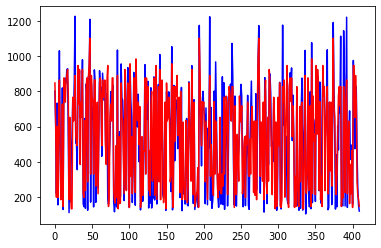

In [247]:
plt.plot(item, test_y, color="blue", linewidth=1.5, linestyle="-")
plt.plot(item, test_pre, color="red", linewidth=1.5, linestyle="-")

In [248]:
r2 = r2_score(test_pre, test_y)
print("R2相关系数为：",r2)

R2相关系数为： 0.7002566653345594


In [249]:
r2 = r2_score(pre, y)
print("R2相关系数为：",r2)

R2相关系数为： 0.8290617060926008
